/tmp/ipykernel_1543196/416228747.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(sheet_names))


KeyError: 'Epoch'

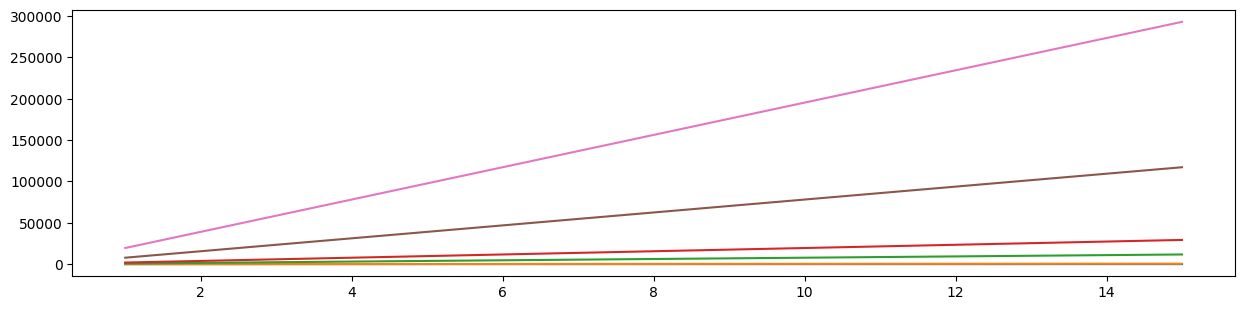

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_comparison_graphs_in_jupyter(excel_file_path):
    # Get the names of all sheets in the Excel file
    sheet_names = pd.ExcelFile(excel_file_path).sheet_names

    # Read data from all sheets in the Excel file
    data_sheets = {name: pd.read_excel(excel_file_path, sheet_name=name) for name in sheet_names}

    # Identify the metrics
    metrics = data_sheets[sheet_names[0]].columns.drop('Epoch')

    # Preprocess the data: Convert to numeric and handle non-numeric values
    for sheet_name, sheet_data in data_sheets.items():
        for metric in metrics:
            # Convert to numeric, replacing non-numeric values with NaN
            sheet_data[metric] = pd.to_numeric(sheet_data[metric], errors='coerce')
            # Replace NaN values with the mean of the valid numeric values
            sheet_data[metric].fillna(sheet_data[metric].mean(), inplace=True)

    # Define the color map for multiple sheets
    color_map = plt.cm.get_cmap('tab10', len(sheet_names))

    # Set up the figure size for the comparison
    plt.figure(figsize=(15, 45))

    # Loop through metrics to create comparison subplots
    for i, metric in enumerate(metrics, 1):
        plt.subplot(len(metrics), 1, i)
        for idx, (sheet_name, sheet_data) in enumerate(data_sheets.items()):
            plt.plot(sheet_data['Epoch'], sheet_data[metric], label=sheet_name, color=color_map(idx))
        plt.title(f'Comparison of {metric} across sheets')
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

    # Display the graphs directly in Jupyter
    plt.show()

# Specify the path to your Excel file
excel_file_path = 'vysdledky_model_15_epoch_all.xlsx'

# Call the function to display the graphs
plot_comparison_graphs_in_jupyter(excel_file_path)


/tmp/ipykernel_1543196/1673046591.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(sheet_names))


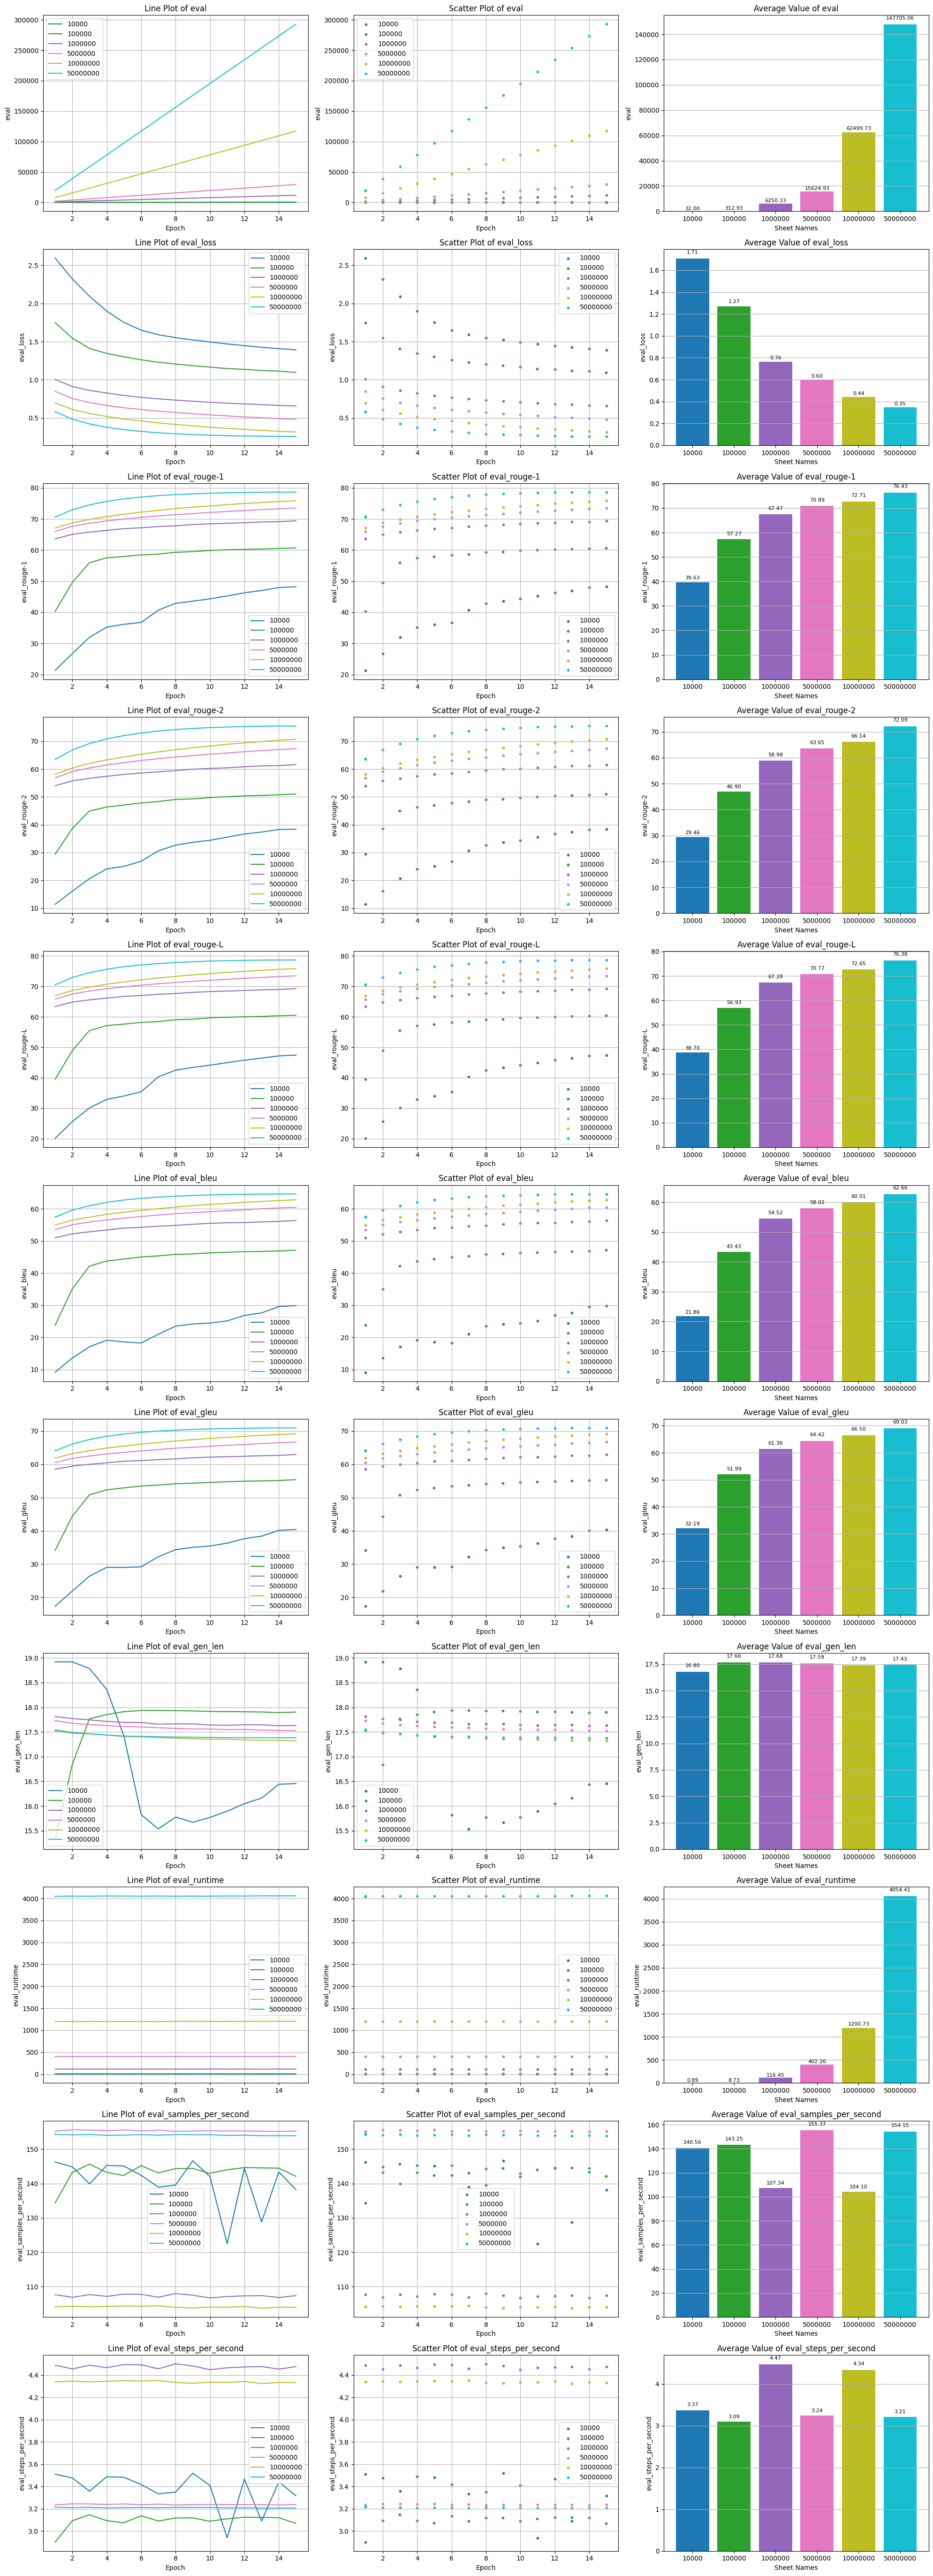

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def modified_plot_with_bar_values(excel_file_path):
    # Get the names of all sheets in the Excel file
    sheet_names = pd.ExcelFile(excel_file_path).sheet_names

    # Read data from all sheets in the Excel file
    data_sheets = {name: pd.read_excel(excel_file_path, sheet_name=name) for name in sheet_names}

    # Identify the metrics
    metrics = data_sheets[sheet_names[0]].columns.drop('Epoch')

    # Preprocess the data: Convert to numeric and handle non-numeric values
    for sheet_name, sheet_data in data_sheets.items():
        for metric in metrics:
            # Convert to numeric, replacing non-numeric values with NaN
            sheet_data[metric] = pd.to_numeric(sheet_data[metric], errors='coerce')
            # Replace NaN values with the mean of the valid numeric values
            sheet_data[metric].fillna(sheet_data[metric].mean(), inplace=True)

    # Define the color map for multiple sheets
    color_map = plt.cm.get_cmap('tab10', len(sheet_names))

    # Set up the figure size for the comparison
    fig, axs = plt.subplots(len(metrics), 3, figsize=(20, 5*len(metrics)))

    # Loop through metrics to create comparison subplots
    for i, metric in enumerate(metrics):
        # Line plot
        for idx, (sheet_name, sheet_data) in enumerate(data_sheets.items()):
            axs[i][0].plot(sheet_data['Epoch'], sheet_data[metric], label=sheet_name, color=color_map(idx))
        axs[i][0].set_title(f'Line Plot of {metric}')
        axs[i][0].set_xlabel('Epoch')
        axs[i][0].set_ylabel(metric)
        axs[i][0].legend()
        axs[i][0].grid(True)

        # Scatter plot
        for idx, (sheet_name, sheet_data) in enumerate(data_sheets.items()):
            axs[i][1].scatter(sheet_data['Epoch'], sheet_data[metric], label=sheet_name, color=color_map(idx), s=10)
        axs[i][1].set_title(f'Scatter Plot of {metric}')
        axs[i][1].set_xlabel('Epoch')
        axs[i][1].set_ylabel(metric)
        axs[i][1].legend()
        axs[i][1].grid(True)

        # Bar chart with values displayed on top
        average_values = [sheet_data[metric].mean() for sheet_data in data_sheets.values()]
        bars = axs[i][2].bar(sheet_names, average_values, color=[color_map(idx) for idx in range(len(sheet_names))])
        axs[i][2].set_title(f'Average Value of {metric}')
        axs[i][2].set_xlabel('Sheet Names')
        axs[i][2].set_ylabel(metric)
        axs[i][2].grid(True, axis='y')
        
        # Add values at the top of the bars
        for bar in bars:
            height = bar.get_height()
            axs[i][2].text(bar.get_x() + bar.get_width() / 2., 1.02*height, f'{height:.2f}', 
                           ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

# Usage example:
excel_file_path = 'vysdledky_slovak_model_15_epoch.xlsx'
modified_plot_with_bar_values(excel_file_path)


/tmp/ipykernel_1543196/3878048015.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(sheet_names))


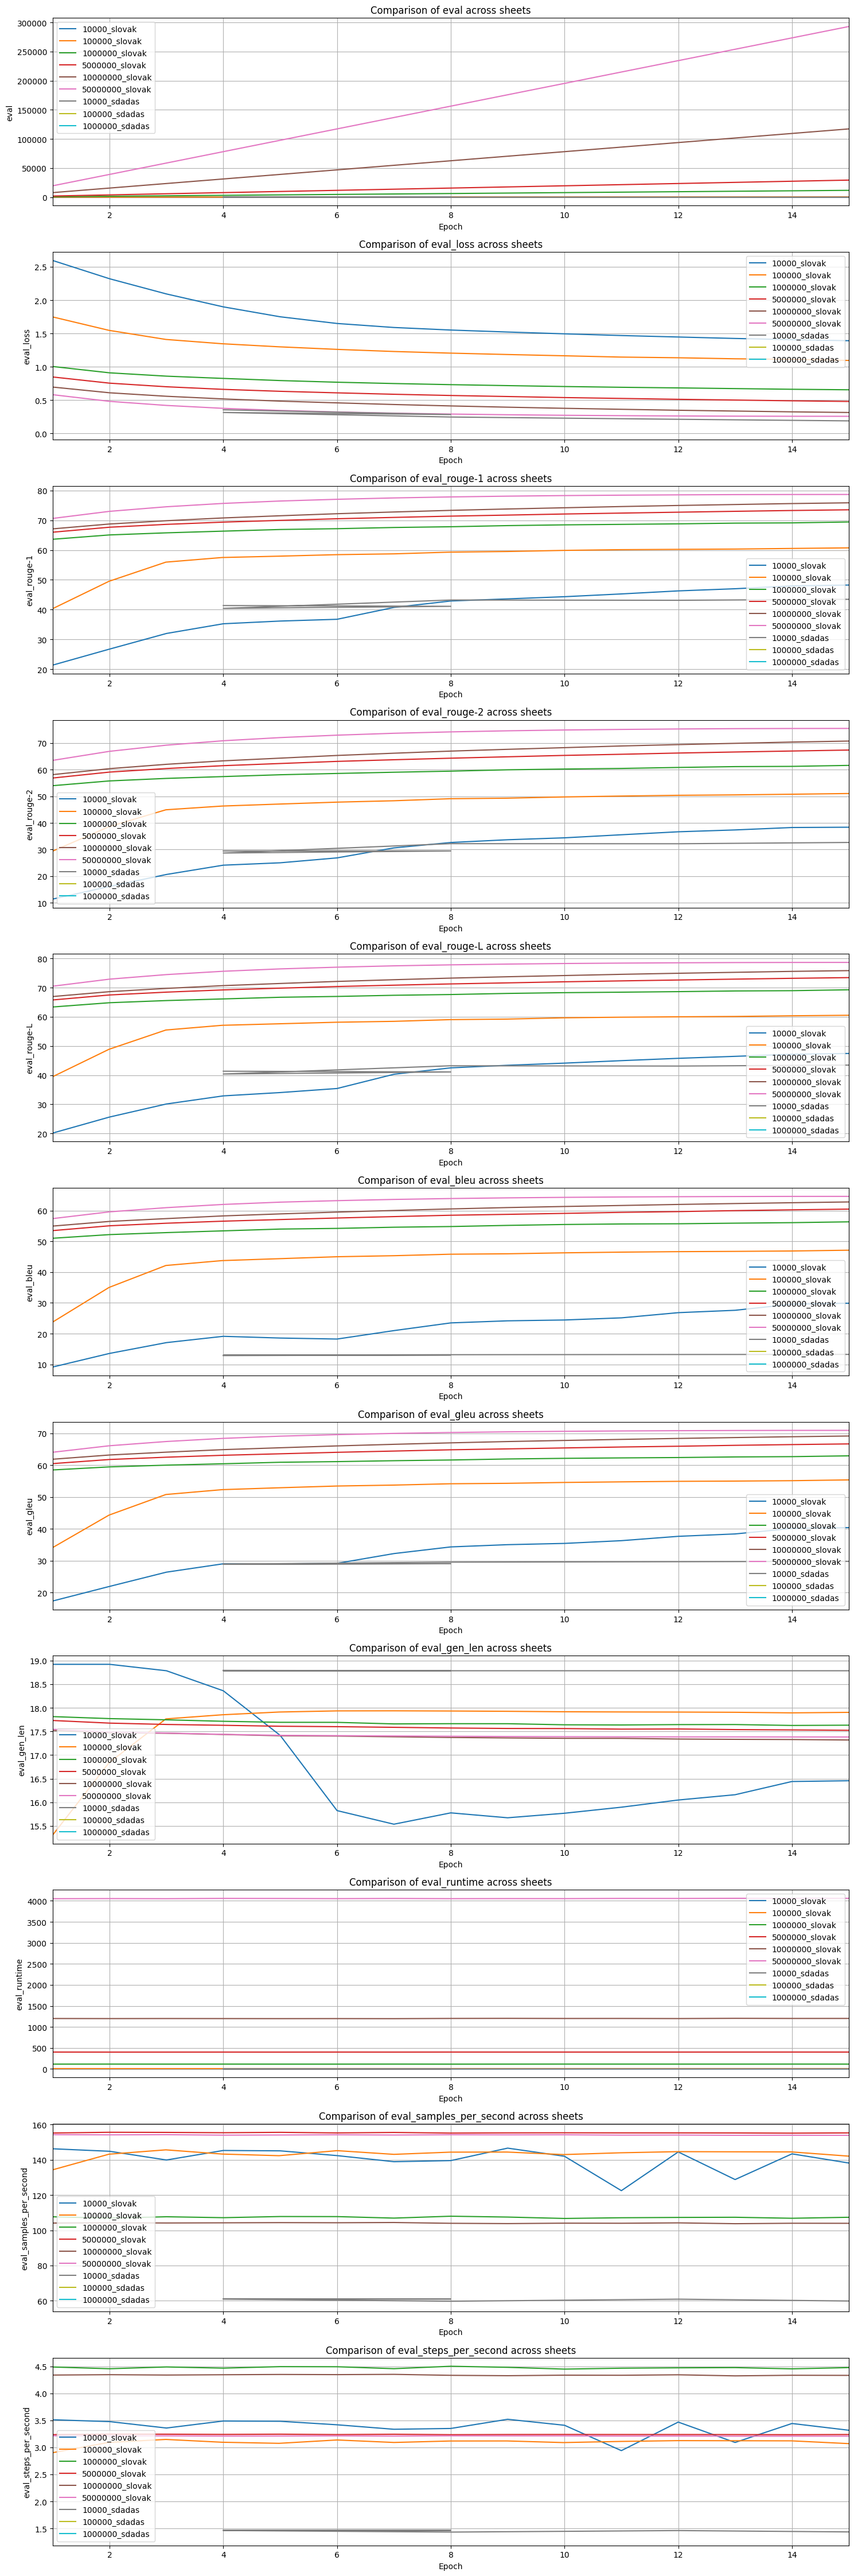

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_comparison_graphs_in_jupyter_v7(excel_file_path):
    # Get the names of all sheets in the Excel file
    sheet_names = pd.ExcelFile(excel_file_path).sheet_names

    # Read data from all sheets in the Excel file
    data_sheets = {name: pd.read_excel(excel_file_path, sheet_name=name) for name in sheet_names}

    # Define the color map for multiple sheets
    color_map = plt.cm.get_cmap('tab10', len(sheet_names))

    # Set up the figure size for the comparison
    plt.figure(figsize=(15, 45))

    # The first metric to be plotted (to identify the number of metrics)
    first_sheet_data = data_sheets[sheet_names[0]]
    metrics = [col for col in first_sheet_data.columns if col != "Epoch"]

    # Loop through metrics to create comparison subplots
    for i, metric in enumerate(metrics, 1):
        plt.subplot(len(metrics), 1, i)
        for idx, (sheet_name, sheet_data) in enumerate(data_sheets.items()):
            # If "Epoch" exists in columns, use it, otherwise default to the first column
            current_x_axis_column = "Epoch" if "Epoch" in sheet_data.columns else sheet_data.columns[0]
            
            # Preprocess the data: Convert to numeric and handle non-numeric values
            sheet_data[metric] = pd.to_numeric(sheet_data[metric], errors='coerce')
            sheet_data[metric].fillna(sheet_data[metric].mean(), inplace=True)
            plt.plot(sheet_data[current_x_axis_column], sheet_data[metric], label=sheet_name, color=color_map(idx))
        plt.title(f'Comparison of {metric} across sheets')
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.xlim(1, 15)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

    # Display the graphs directly in Jupyter
    plt.show()

# Usage:
plot_comparison_graphs_in_jupyter_v7("vysdledky_model_15_epoch_all.xlsx")
